In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1.importing data

In [3]:
data = pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### 2.1 getting data ready

In [4]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.rename({'Unnamed: 0': 'Name'}, axis=1,inplace=True)

In [6]:
data['Name']=data['Name'].astype('category') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      50 non-null     category
 1   Murder    50 non-null     float64 
 2   Assault   50 non-null     int64   
 3   UrbanPop  50 non-null     int64   
 4   Rape      50 non-null     float64 
dtypes: category(1), float64(2), int64(2)
memory usage: 4.2 KB


In [7]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 5)

### 2.2 outlier detection

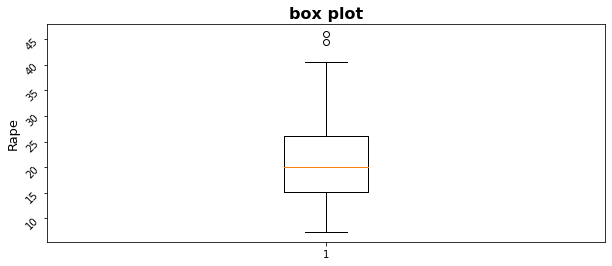

In [8]:
plt.figure(figsize=(10,4))                                                   #setting the frame using figure size
#figsize = plt.figaspect(9/6)                                                #setting the frame using aspect ratio
plt.title("box plot", fontsize = 16, fontweight = "bold")                    #title
plt.ylabel("Rape", fontsize = 13 )                                           #y-label
plt.yticks( rotation = 45, fontsize = 10)                                    #y-values rotation and font size


plt.boxplot(x='Rape', data=data)                                                #outlier
# plt.boxplot(x='Murder', data=data)                                            #no outlier
# plt.boxplot(x='Assault', data=data)                                           #no outlier
# plt.boxplot(x='UrbanPop', data=data)                                          #no outlier


plt.show()                                                                   #print/display the plot
#plt.savefig("Used Cars Bar.png")                                            #to create a .png file of our plot

In [9]:
print(np.where(data['Rape']>42))
#average rape rate is 21 ; replace rape rate by 21 for outliers 
#don't delete the record becoz of outliers ;
#also we don't want to have outliers
#so replace these with median or mode

(array([ 1, 27], dtype=int64),)


In [10]:
data['Rape'][1] = 21
data['Rape'][27] = 21

### 2.3 scaling of data

In [11]:
#Standardization of data

from sklearn.preprocessing import StandardScaler
data_s=StandardScaler().fit_transform(data.iloc[:,1:])
data_s

array([[ 1.25517927,  0.79078716, -0.52619514,  0.119185  ],
       [ 0.51301858,  1.11805959, -1.22406668,  0.09377242],
       [ 0.07236067,  1.49381682,  1.00912225,  1.36440141],
       [ 0.23470832,  0.23321191, -1.08449238, -0.09682193],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.58420525],
       [ 0.02597562,  0.40290872,  0.86954794,  2.34278574],
       [-1.04088037, -0.73648418,  0.79976079, -1.16415028],
       [-0.43787481,  0.81502956,  0.45082502, -0.56695466],
       [ 1.76541475,  1.99078607,  1.00912225,  1.47875802],
       [ 2.22926518,  0.48775713, -0.38662083,  0.70367434],
       [-0.57702994, -1.51224105,  1.21848371, -0.0078779 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.7702553 ],
       [ 0.60578867,  0.94836277,  1.21848371,  0.47496112],
       [-0.13637203, -0.70012057, -0.03768506,  0.09377242],
       [-1.29599811, -1.39102904, -0.5959823 , -1.1387377 ],
       [-0.41468229, -0.67587817,  0.03210209, -0.28741628],
       [ 0.44344101, -0.

### 3.1 creating clusters

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
dbscan = DBSCAN(eps=1, min_samples=4)                            #an expert tells us minpoints and eps
dbscan.fit(data_s)                                               #eps and minpoints are already given to us

DBSCAN(eps=1, min_samples=4)

In [14]:
dbscan.labels_       #Noisy samples are given the label -1

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  2,  1,  1,  1,  1,
        0,  1, -1, -1, -1,  1, -1, -1,  1,  1,  2,  1, -1, -1,  2, -1,  1,
        1,  1, -1,  1, -1,  0,  1,  0,  2, -1, -1,  1, -1,  1,  1,  1],
      dtype=int64)

In [15]:
df=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [16]:
data1=pd.concat([data,df],axis=1)
data1.head()

,Name,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,21.0,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [17]:
data1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,8.645455,210.227273,69.318182,24.268182
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.830000,100.250000,59.550000,14.490000
3,2,11.600000,239.000000,82.500000,24.150000


### 3.2 cluster visualisation

In [18]:
from sklearn import preprocessing                  #transformations of categorical data using LabelEncoder
le = preprocessing.LabelEncoder()
data1['Name_id'] = le.fit_transform(data1['Name'])
data1.drop(['Name'],axis=1,inplace = True)
data1.head()

,Murder,Assault,UrbanPop,Rape,cluster,Name_id
0,13.2,236,58,21.2,0,0
1,10.0,263,48,21.0,-1,1
2,8.1,294,80,31.0,-1,2
3,8.8,190,50,19.5,-1,3
4,9.0,276,91,40.6,-1,4


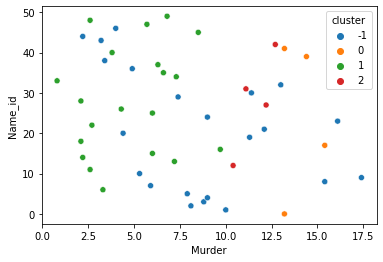

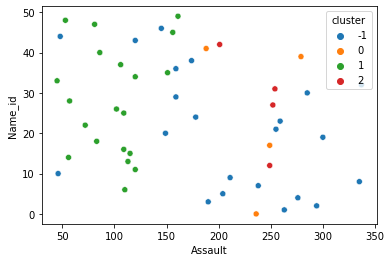

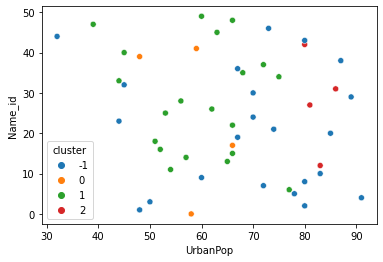

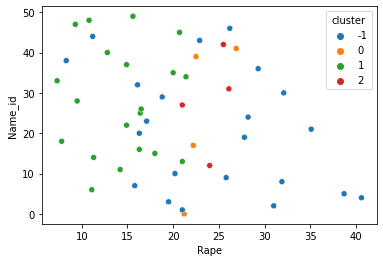

In [19]:
import seaborn as sns

sns.scatterplot(x='Murder', y='Name_id', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])                 
plt.show()
sns.scatterplot(x='Assault', y='Name_id', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])               
plt.show()
sns.scatterplot(x='UrbanPop', y='Name_id', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])              
plt.show()
sns.scatterplot(x='Rape', y='Name_id', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])           
plt.show()

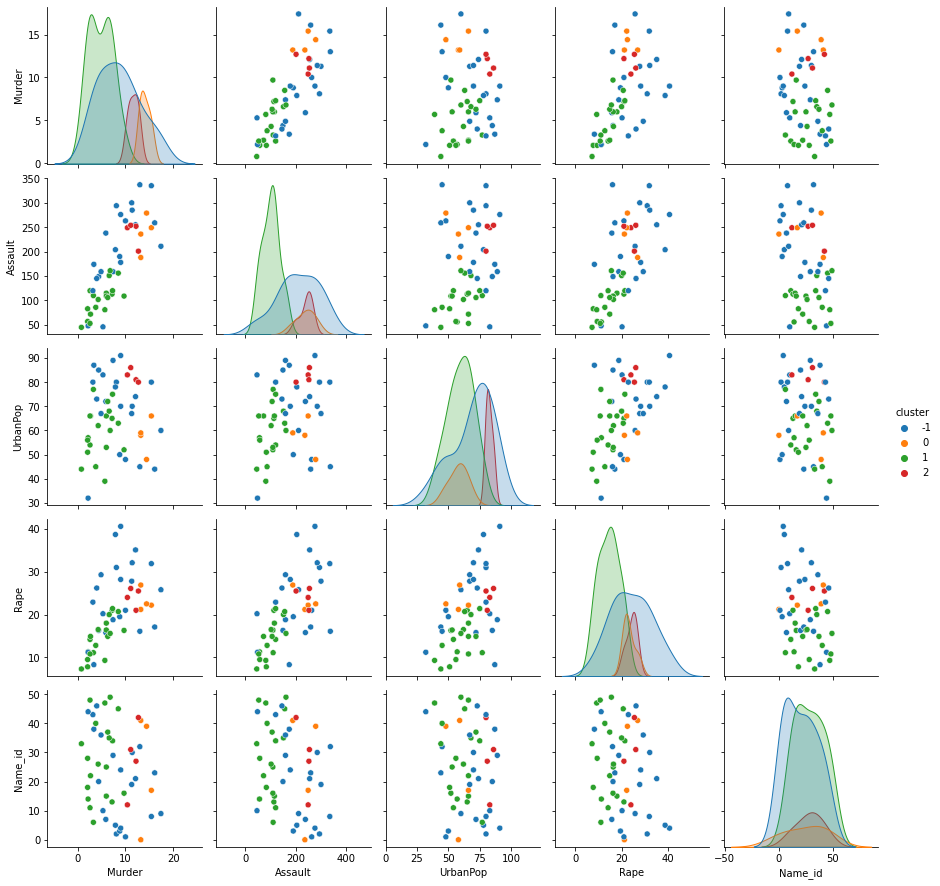

In [20]:
import seaborn as sns
#pal = sns.color_palette("tab")

sns.pairplot(data1, 
             palette=sns.color_palette("tab10")[:4],   #[:4] bcoz our color palette has many colors but we need 4 color for 4 clusters 
             hue = 'cluster'                        #two different color according cluster_id    
            )

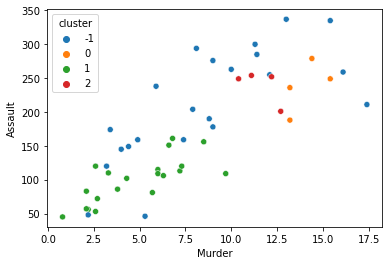

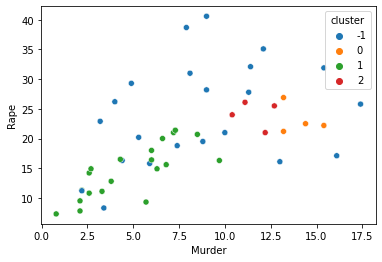

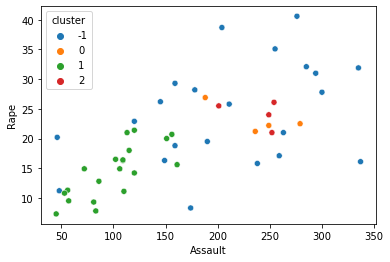

In [21]:
import seaborn as sns

sns.scatterplot(x='Murder', y='Assault', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])       
plt.show()
sns.scatterplot(x='Murder', y='Rape', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])     
plt.show()
sns.scatterplot(x='Assault', y='Rape', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])         
plt.show()

In [22]:
#****************************inferences from the clusters ******************************

#cities belongs to cluster_id = 0 has lowest murder, assault and rape rate
#cities belongs to cluster_id = 2 has slightly higher murder, assault and rape rate than cities belongs to cluster_id = 0
#cities belongs to cluster_id = 1 and 3 has highest crime rate

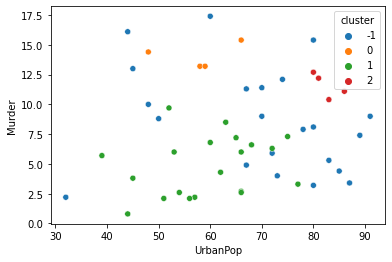

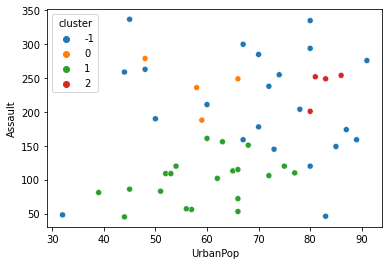

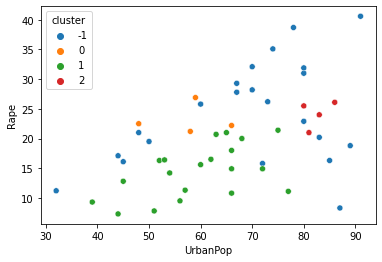

In [23]:
import seaborn as sns

sns.scatterplot(x='UrbanPop', y='Murder', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])            
plt.show()
sns.scatterplot(x='UrbanPop', y='Assault', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])         
plt.show()
sns.scatterplot(x='UrbanPop', y='Rape', data=data1, hue = 'cluster' ,palette=sns.color_palette("tab10")[:4])        
plt.show()

In [24]:
#****************************inferences from the clusters ******************************

#Rape rate is higher in urban population
#Murder and Assault rate is same in urban and non urban population